Точность модели наивного Байеса = 99.43 %


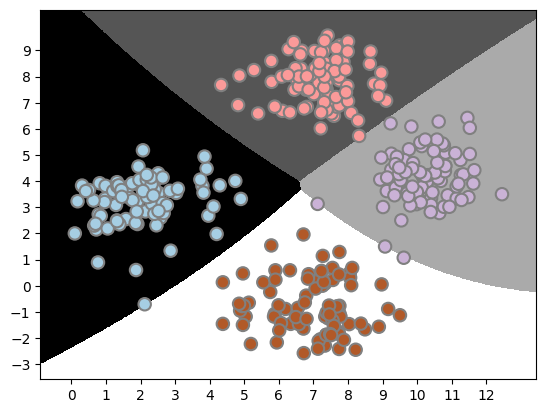

Точность новой модели = 96.59 %


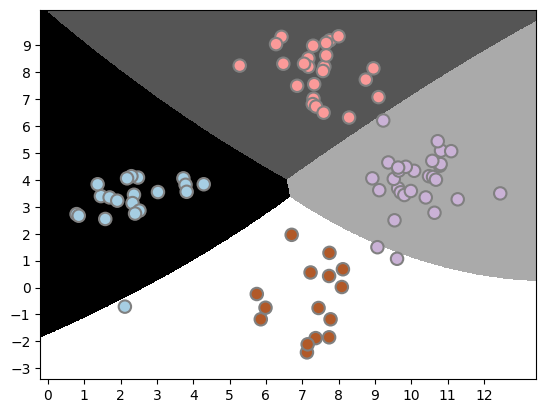

Accuracy (кросс-валидация): 99.15%
Precision: 99.18%
Recall: 99.15%
F1-score: 99.15%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score

from utilities import visualize_classifier

# Файл с исходными данными
input_data_path = 'data_multivar_nb.txt'

# Импорт данных из файла
dataset = np.loadtxt(input_data_path, delimiter=',')
features, labels = dataset[:, :-1], dataset[:, -1]

# Инициализация модели Байеса
model = GaussianNB()

# Обучение модели
model.fit(features, labels)

# Предсказание для обучающей выборки
predicted_labels = model.predict(features)

# Оценка точности модели
model_accuracy = 100.0 * (labels == predicted_labels).sum() / features.shape[0]
print("Точность модели наивного Байеса =", round(model_accuracy, 2), "%")

# Визуализация результатов классификации
visualize_classifier(model, features, labels)

###############################################
# Кросс-валидация

# Разделение данных на обучающую и тестовую части
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(features, labels, test_size=0.25, random_state=7)
new_model = GaussianNB()
new_model.fit(X_train_split, y_train_split)
y_test_predicted = new_model.predict(X_test_split)

# Расчет точности новой модели
new_accuracy = 100.0 * (y_test_split == y_test_predicted).sum() / X_test_split.shape[0]
print("Точность новой модели =", round(new_accuracy, 2), "%")

# Визуализация работы классификатора
visualize_classifier(new_model, X_test_split, y_test_split)

###############################################
# Метрики оценки

k_folds = 4
accuracy_scores = cross_val_score(model,
        features, labels, scoring='accuracy', cv=k_folds)
print("Accuracy (кросс-валидация): " + str(round(100*accuracy_scores.mean(), 2)) + "%")

precision_scores = cross_val_score(model,
        features, labels, scoring='precision_weighted', cv=k_folds)
print("Precision: " + str(round(100*precision_scores.mean(), 2)) + "%")

recall_scores = cross_val_score(model,
        features, labels, scoring='recall_weighted', cv=k_folds)
print("Recall: " + str(round(100*recall_scores.mean(), 2)) + "%")

f1_scores = cross_val_score(model,
        features, labels, scoring='f1_weighted', cv=k_folds)
print("F1-score: " + str(round(100*f1_scores.mean(), 2)) + "%")